# 가위바위보 분류기 만들기

* Data 만들기
https://teachablemachine.withgoogle.com/ 

In [1]:
import tensorflow as tf
import numpy as np

from PIL import Image
import glob
import os

from tensorflow import keras

In [2]:
# DATA img size : (224 ,244)
# data 불러와서 사이즈 변경 (28,28)

def resize_imag(img_path) :
    image = glob.glob(img_path + "/*.jpg")
    
    print(len(image), " images to resized")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장하기
    target_size = (28,28)
    for img in image :
        old_img = Image.open(img)
        new_img= old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,'JPEG')
        
    print(len(image),'images resize')


In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 바꾸기
image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper/scissor"
resize_imag(image_dir_path)
print ("가위 이미지 resize 완료")

1000  images to resized
1000 images resize
가위 이미지 resize 완료


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 바꾸기
image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper/rock"
resize_imag(image_dir_path)
print ("바위 이미지 resize 완료")

1000  images to resized
1000 images resize
바위 이미지 resize 완료


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 바꾸기
image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper/paper"
resize_imag(image_dir_path)
print ("보 이미지 resize 완료")

1000  images to resized
1000 images resize
보 이미지 resize 완료


In [6]:
def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


라벨 0


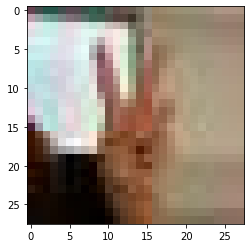

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train_norm[0])
print('라벨',y_train[0])

In [8]:
# 딥러닝 네트워크 설계

# tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예시

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(9, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(9, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(9, activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  8


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 9)         252       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 9)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 9)         738       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 9)           0         
_________________________________________________________________
flatten (Flatten)            (None, 225)               0         
_________________________________________________________________
dropout (Dropout)            (None, 225)               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 2

In [10]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (3000, 28, 28, 3)
After Reshape - x_train_reshaped shape: (3000, 28, 28, 3)


In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
94/94 [==============================] - 3s 4ms/step - loss: 1.0437 - accuracy: 0.4253
Epoch 2/10
94/94 [==============================] - 0s 3ms/step - loss: 0.7819 - accuracy: 0.6257
Epoch 3/10
94/94 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.7013
Epoch 4/10
94/94 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7780
Epoch 5/10
94/94 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8223
Epoch 6/10
94/94 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.8470
Epoch 7/10
94/94 [==============================] - 0s 3ms/step - loss: 0.3385 - accuracy: 0.8677
Epoch 8/10
94/94 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.8877
Epoch 9/10
94/94 [==============================] - 0s 3ms/step - loss: 0.2789 - accuracy: 0.8950
Epoch 10/10
94/94 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.9040


### Test Data 만들기

In [12]:
# DATA img size : (224 ,244)
# data 불러와서 사이즈 변경 (28,28)

def resize_imag(img_path) :
    image = glob.glob(img_path + "/*.jpg")
    
    print(len(image), " images to resized")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장하기
    target_size = (28,28)
    for img in image :
        old_img = Image.open(img)
        new_img= old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,'JPEG')
        
    print(len(image),'images resize')

In [13]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 바꾸기
image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper/test/test/scissor"
resize_imag(image_dir_path)
print ("가위 이미지 resize 완료")

100  images to resized
100 images resize
가위 이미지 resize 완료


In [14]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 바꾸기
image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper/test/test/rock"
resize_imag(image_dir_path)
print ("바위 이미지 resize 완료")

100  images to resized
100 images resize
바위 이미지 resize 완료


In [15]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 바꾸기
image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper/test/test/paper"
resize_imag(image_dir_path)
print ("보 이미지 resize 완료")

100  images to resized
100 images resize
보 이미지 resize 완료


In [16]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [17]:
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


라벨 0


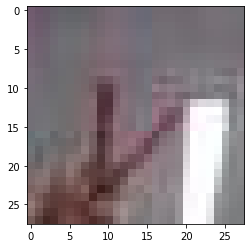

In [18]:
import matplotlib.pyplot as plt

plt.imshow(x_test_reshaped[0])
print('라벨',y_test[0])

### 성능평가 (정확도)

In [19]:
# 시험용 데이터를 통해 인식 정확도 봅시다

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.7409 - accuracy: 0.7433
test_loss: 0.7409194707870483 
test_accuracy: 0.7433333396911621


### 회고

역시 데이터가 많아야지 학습량이 많아져 특징을 잘 찾아내는것 같습니다 